In [1]:
import numpy as np
# from garuda.ops import obb_to_aa
import rasterio
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from skimage.draw import polygon
from skimage.measure import find_contours
from PIL import Image



In [2]:
obb_label_path_1 = "../data/region_performace/uttar_pradesh_same_class_count/labels/8610786_3400222.txt"
#read the file make list
obb_label_1=[]
with open(obb_label_path_1,'r') as file:
    for line in file:
        obb_label_1.append([float(value) for value in line.strip().split()])

print(obb_label_1)        


[[2.0, 0.465623, 0.930131, 0.485357, 0.943309, 0.51361, 0.901023, 0.493913, 0.887845], [2.0, 0.833134, 0.870371, 0.842564, 0.850396, 0.798946, 0.829836, 0.789516, 0.849853], [2.0, 0.312232, 0.705225, 0.328361, 0.716819, 0.356069, 0.678326, 0.339976, 0.666732], [2.0, 0.037891, 0.316315, 0.058135, 0.321445, 0.069094, 0.278193, 0.04885, 0.273063], [2.0, 0.471922, 0.231355, 0.494131, 0.225932, 0.483973, 0.184473, 0.4618, 0.189896], [2.0, 0.632084, 0.092628, 0.65251, 0.10364, 0.672134, 0.067352, 0.651672, 0.056299], [2.0, 0.042406, 0.055339, 0.063705, 0.065099, 0.085077, 0.018508, 0.063778, 0.008748]]


0.465623
0.833134
0.312232
0.037891
0.471922
0.632084
0.042406


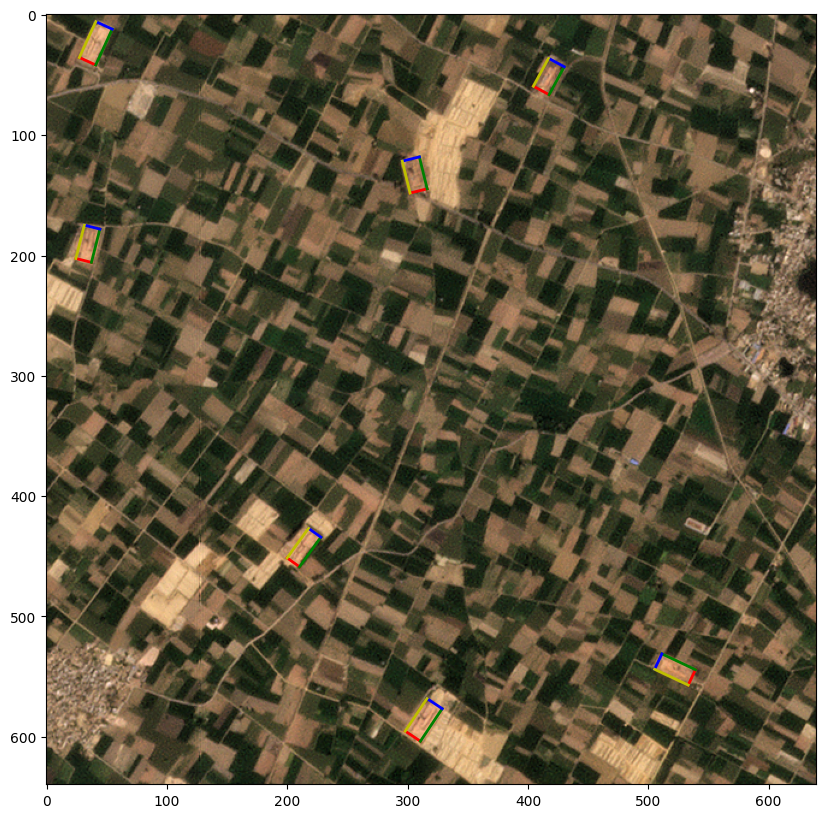

In [3]:
tiff_file = "../data/region_performace/uttar_pradesh_same_class_count/images/8610786_3400222.tif"
# image= rasterio.open(tiff_file)
# print(image.shape)
image_path_77="/home/patel_zeel/kiln_compass_24/figures/kiln_locations_CFCBK.png"
# im=Image.open(image_path_77)
#transfor numpy array
# im=np.array(im)
# print(im.shape)
image_size=640

with rasterio.open(tiff_file) as src:
    red=src.read(1)
    green=src.read(2)
    blue=src.read(3)
    image = np.dstack((red, green, blue))
    img_width = src.width
    img_height = src.height
    fig, ax = plt.subplots(figsize=(10, 10))

    ax.imshow(image)
    for bbox in obb_label_1:
        class_id,x1,y1,x2,y2,x3,y3,x4,y4=bbox
        print(x1)
        x1_1=x1*image_size
        y1_1=y1*image_size
        x2_1=x2*image_size
        y2_1=y2*image_size
        x3_1=x3*image_size
        y3_1=y3*image_size
        x4_1=x4*image_size
        y4_1=y4*image_size

        ax.plot([x1_1, x2_1], [y1_1, y2_1], color='r', linewidth=2)
        ax.plot([x2_1, x3_1], [y2_1, y3_1], color='g', linewidth=2)
        ax.plot([x3_1, x4_1], [y3_1, y4_1], color='b', linewidth=2)
        ax.plot([x4_1, x1_1], [y4_1, y1_1], color='y', linewidth=2)

(640, 640)
(640, 640, 3)
(495,)
(495,)
Bounding Box Class 2.0:
Red Channel - Mean: 208.17373737373737, Std: 29.80139846850316
Green Channel - Mean: 151.04848484848486, Std: 22.573822166378147
Blue Channel - Mean: 111.24646464646464, Std: 16.869908139423536
Outside Red Channel - Mean: 87.72619987533763, Std: 50.93729348887591
Outside Green Channel - Mean: 77.96680558780753, Std: 35.062047055062685
Outside Blue Channel - Mean: 53.24738636780289, Std: 28.599090357373157
(437,)
(437,)
Bounding Box Class 2.0:
Red Channel - Mean: 192.92219679633868, Std: 24.32735155371463
Green Channel - Mean: 137.9199084668192, Std: 15.822976428535284
Blue Channel - Mean: 96.57437070938215, Std: 12.25574473731547
Outside Red Channel - Mean: 87.75956281481952, Std: 50.99424827083648
Outside Green Channel - Mean: 77.9911868863998, Std: 35.101906508379294
Outside Blue Channel - Mean: 53.27127819475368, Std: 28.636340267294205
(385,)
(385,)
Bounding Box Class 2.0:
Red Channel - Mean: 198.6961038961039, Std: 37.

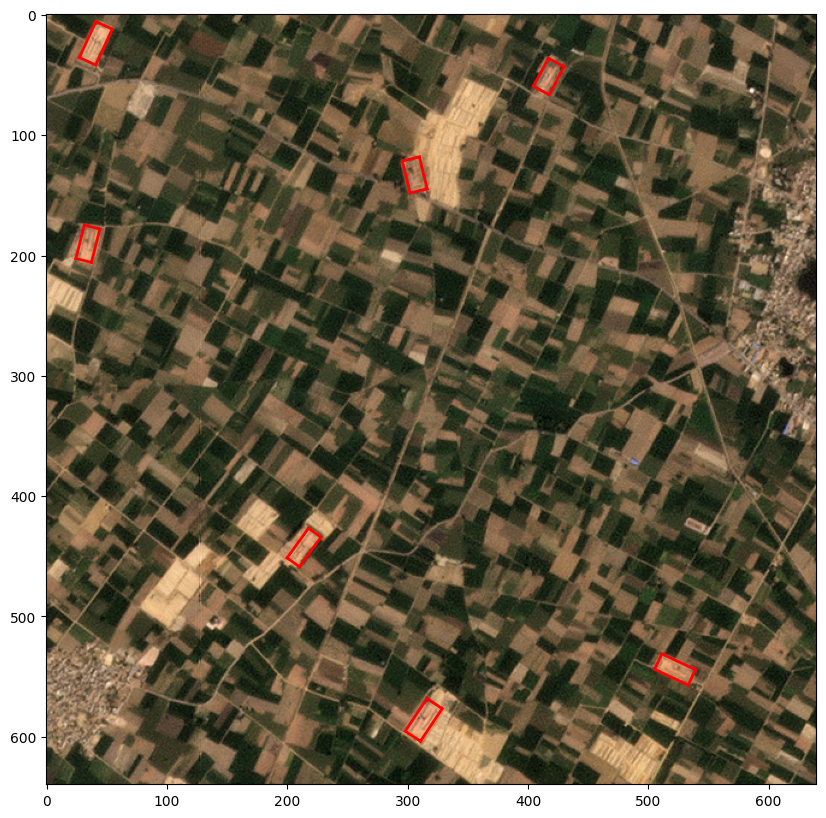

In [4]:
with rasterio.open(tiff_file) as src:
    red=src.read(1)
    print(red.shape)
    green=src.read(2)
    blue=src.read(3)
    image = np.dstack((red, green, blue))
    print(image.shape)
    img_width = src.width
    img_height = src.height
    fig, ax = plt.subplots(figsize=(10, 10))

    ax.imshow(image)
    for bbox in obb_label_1:
        class_id,x1,y1,x2,y2,x3,y3,x4,y4=bbox
        coors=np.array([
            [x1*img_width, y1*img_height],
            [x2*img_width, y2*img_height],
            [x3*img_width, y3*img_height],
            [x4*img_width, y4*img_height]
        ])
        first_box = coors[0]
        # print(first_box)

        mask = np.zeros((img_height, img_width), dtype=bool)
        rr, cc = polygon(coors[:, 1], coors[:, 0], shape=(img_height, img_width))
        print(rr.shape)
        print(cc.shape)
        mask[rr, cc] = True
        outside_mask = ~mask    
        region_red=red[mask]
        otside_red=red[outside_mask]
        outside_green=green[outside_mask]
        outside_blue=blue[outside_mask]
        #print the data type of the region_red
        # print(region_red.dtype)
        region_green=green[mask]

        
        region_blue=blue[mask]
        outside_red_mean, outside_red_std = otside_red.mean(), otside_red.std()
        outside_green_mean, outside_green_std = outside_green.mean(), outside_green.std()
        outside_blue_mean, outside_blue_std = outside_blue.mean(), outside_blue.std()

        mean_red, std_red = region_red.mean(), region_red.std()
        mean_green, std_green = region_green.mean(), region_green.std()
        mean_blue, std_blue = region_blue.mean(), region_blue.std()
        
        print(f"Bounding Box Class {class_id}:")
        print(f"Red Channel - Mean: {mean_red}, Std: {std_red}")
        print(f"Green Channel - Mean: {mean_green}, Std: {std_green}")
        print(f"Blue Channel - Mean: {mean_blue}, Std: {std_blue}")
        print(f"Outside Red Channel - Mean: {outside_red_mean}, Std: {outside_red_std}")
        print(f"Outside Green Channel - Mean: {outside_green_mean}, Std: {outside_green_std}")
        print(f"Outside Blue Channel - Mean: {outside_blue_mean}, Std: {outside_blue_std}")
        
        # print(region_red)



        # print(coors)
        # print(coors)
        # print(coors.shape)
        for i in range(4):
            ax.plot(
                [coors[i][0],coors[(i+1)%4][0]],
                [coors[i][1],coors[(i+1)%4][1]],
                color='r',linewidth=2
            )



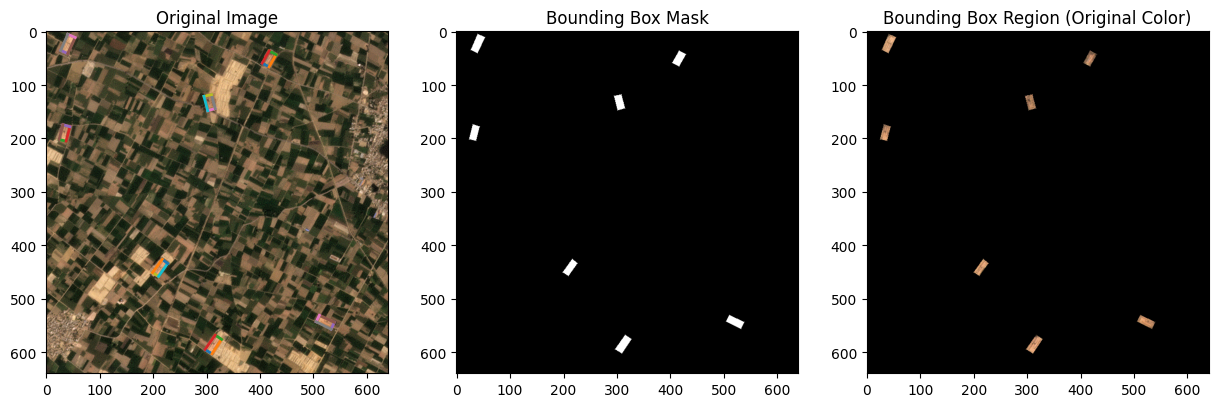

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from skimage.draw import polygon  # Import polygon function

image_size = 640


with rasterio.open(tiff_file) as src:
    red = src.read(1)
    green = src.read(2)
    blue = src.read(3)
    image = np.dstack((red, green, blue))
    img_width = src.width
    img_height = src.height
    
    fig, ax = plt.subplots(1, 3, figsize=(15, 10))  # Create subplots for image, mask, and extracted region
    ax[0].imshow(image)
    ax[0].set_title("Original Image")
    
    mask = np.zeros((img_height, img_width), dtype=bool)  # Initialize mask
    
    for bbox in obb_label_1:
        class_id, x1, y1, x2, y2, x3, y3, x4, y4 = bbox
        
        # Scale normalized coordinates to image dimensions
        coords = np.array([
            [x1 * img_width, y1 * img_height],
            [x2 * img_width, y2 * img_height],
            [x3 * img_width, y3 * img_height],
            [x4 * img_width, y4 * img_height]
        ]).astype(int)
        
        # Update mask for the bounding box region
        rr, cc = polygon(coords[:, 1], coords[:, 0])  # Convert coordinates for masking
        mask[rr, cc] = True  # Set mask to True for the bounding box region

        # Plot bounding box on the original image
        for i in range(4):
            ax[0].plot(
                [coords[i][0], coords[(i + 1) % 4][0]],
                [coords[i][1], coords[(i + 1) % 4][1]],
                linewidth=2,
                label=f"Class {class_id}"
            )

    # Extract the region of the bounding box from the original image
    region_image = image.copy()
    region_image[~mask] = 0  # Set all pixels outside the bounding box to black

    # Visualize the mask
    ax[1].imshow(mask, cmap="gray")
    ax[1].set_title("Bounding Box Mask")
    
    # Visualize the extracted bounding box region in original color
    ax[2].imshow(region_image)
    ax[2].set_title("Bounding Box Region (Original Color)")

plt.show()


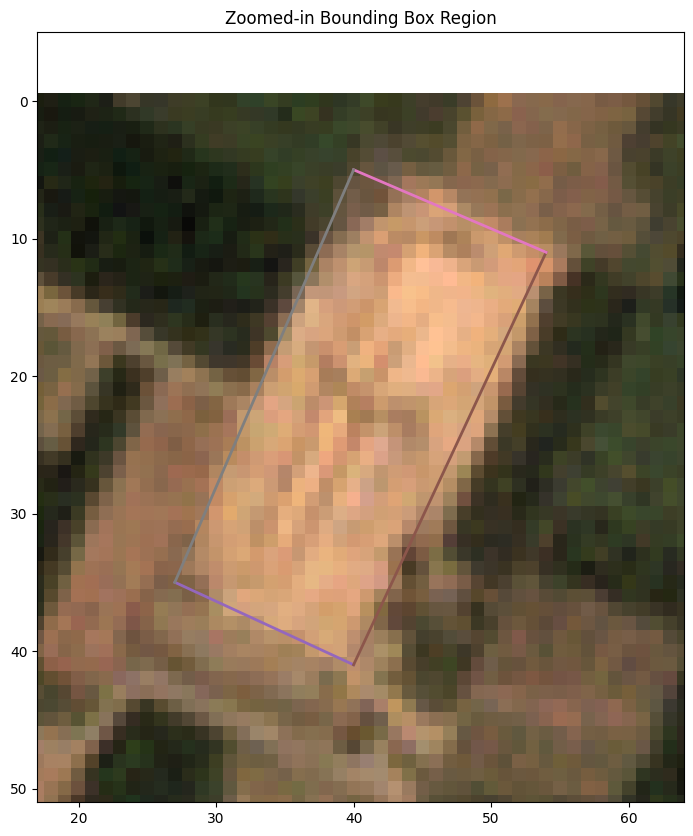

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from skimage.draw import polygon  # Import polygon function

image_size = 640


with rasterio.open(tiff_file) as src:
    red = src.read(1)
    green = src.read(2)
    blue = src.read(3)
    image = np.dstack((red, green, blue))
    img_width = src.width
    img_height = src.height
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))  # Single plot for zoomed bounding box region
    ax.imshow(image)
    
    for bbox in obb_label_1:
        class_id, x1, y1, x2, y2, x3, y3, x4, y4 = bbox
        
        # Scale normalized coordinates to image dimensions
        coords = np.array([
            [x1 * img_width, y1 * img_height],
            [x2 * img_width, y2 * img_height],
            [x3 * img_width, y3 * img_height],
            [x4 * img_width, y4 * img_height]
        ]).astype(int)
        
        # Plot bounding box on the image
        for i in range(4):
            ax.plot(
                [coords[i][0], coords[(i + 1) % 4][0]],
                [coords[i][1], coords[(i + 1) % 4][1]],
                linewidth=2,
                label=f"Class {class_id}"
            )
        
        # Zoom in on the bounding box region by adjusting axis limits
        x_min = min(coords[:, 0])
        x_max = max(coords[:, 0])
        y_min = min(coords[:, 1])
        y_max = max(coords[:, 1])
        
        # Add a margin around the bounding box to avoid cropping the box
        margin = 10
        ax.set_xlim([x_min - margin, x_max + margin])
        ax.set_ylim([y_max + margin, y_min - margin])  # Invert y-axis for image plotting

    ax.set_title("Zoomed-in Bounding Box Region")
    plt.show()


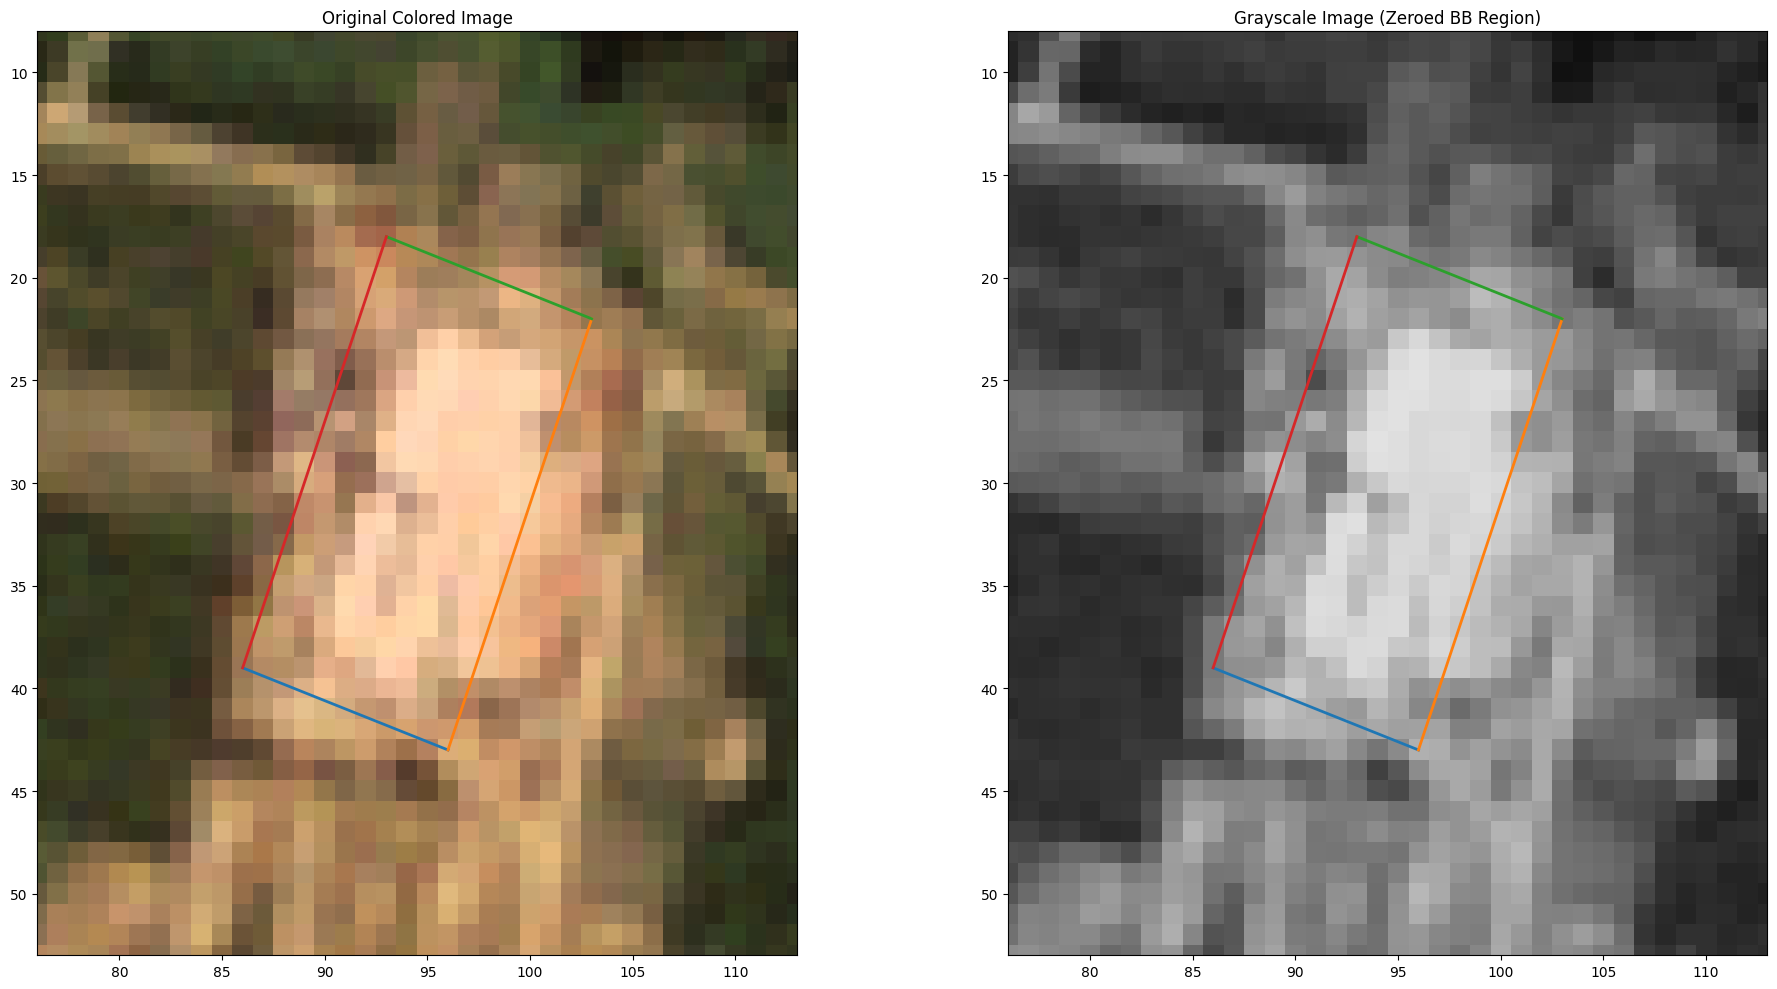

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from skimage.draw import polygon  # Import polygon function

image_size = 640


with rasterio.open(tiff_file) as src:
    red = src.read(1)
    green = src.read(2)
    blue = src.read(3)
    image = np.dstack((red, green, blue))
    img_width = src.width
    img_height = src.height
    
    # Convert to grayscale (black and white)
    grayscale_image = np.mean(image, axis=2).astype(np.uint8)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))  # Two subplots side by side
    
    # Plot the colored image with bounding box on ax1
    ax1.imshow(image)
    ax1.set_title("Original Colored Image")
    for bbox in obb_label_1:
        class_id, x1, y1, x2, y2, x3, y3, x4, y4 = bbox
        
        # Scale normalized coordinates to image dimensions
        coords = np.array([
            [x1 * img_width, y1 * img_height],
            [x2 * img_width, y2 * img_height],
            [x3 * img_width, y3 * img_height],
            [x4 * img_width, y4 * img_height]
        ]).astype(int)
        
        # Plot bounding box on the colored image
        for i in range(4):
            ax1.plot(
                [coords[i][0], coords[(i + 1) % 4][0]],
                [coords[i][1], coords[(i + 1) % 4][1]],
                linewidth=2,
                label=f"Class {class_id}"
            )
        
        # Zoom into the bounding box region
        x_min = min(coords[:, 0])
        x_max = max(coords[:, 0])
        y_min = min(coords[:, 1])
        y_max = max(coords[:, 1])
        
        # Add a margin around the bounding box to avoid cropping
        margin = 10
        ax1.set_xlim([x_min - margin, x_max + margin])
        ax1.set_ylim([y_max + margin, y_min - margin])  # Invert y-axis for image plotting

    # Plot the grayscale image with bounding box on ax2
    ax2.imshow(grayscale_image, cmap='gray')
    ax2.set_title("Grayscale Image (Zeroed BB Region)")
    
    # Set pixel values to zero inside the bounding box region in the grayscale image
    for bbox in obb_label_1:
        class_id, x1, y1, x2, y2, x3, y3, x4, y4 = bbox
        
        # Scale normalized coordinates to image dimensions
        coords = np.array([
            [x1 * img_width, y1 * img_height],
            [x2 * img_width, y2 * img_height],
            [x3 * img_width, y3 * img_height],
            [x4 * img_width, y4 * img_height]
        ]).astype(int)
        
        # Create a mask for the bounding box region
        mask = np.zeros((img_height, img_width), dtype=bool)
        rr, cc = polygon(coords[:, 1], coords[:, 0])  # Convert coordinates for masking
        mask[rr, cc] = True
        
        # Set pixel values to zero inside the bounding box in the grayscale image
        grayscale_image[mask] =False
        
        # Plot bounding box on the grayscale image
        for i in range(4):
            ax2.plot(
                [coords[i][0], coords[(i + 1) % 4][0]],
                [coords[i][1], coords[(i + 1) % 4][1]],
                linewidth=2,
                label=f"Class {class_id}"
            )
        
        # Zoom into the bounding box region on grayscale image
        x_min = min(coords[:, 0])
        x_max = max(coords[:, 0])
        y_min = min(coords[:, 1])
        y_max = max(coords[:, 1])
        
        # Add a margin around the bounding box to avoid cropping
        margin = 10
        ax2.set_xlim([x_min - margin, x_max + margin])
        ax2.set_ylim([y_max + margin, y_min - margin])  # Invert y-axis for image plotting

    # Display the plot
    plt.tight_layout()
    plt.show()


ValueError: 'red' is not a valid value for cmap; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_grey', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'grey', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

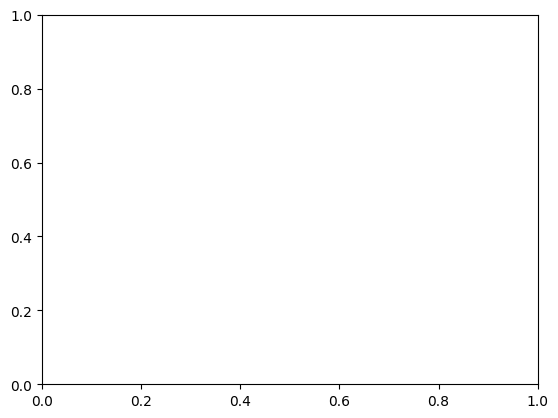

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming `image` is a NumPy array of shape (height, width, 3)
green_channel = image[:, :, 0]  # Green channel is the second in RGB

# Visualize the green channel
plt.imshow(green_channel, cmap='red')
plt.title("Green Channel")
plt.colorbar()
plt.show()

# Calculate statistics
mean_green = np.mean(green_channel)
std_green = np.std(green_channel)

print(f"Mean Green Value: {mean_green}")
print(f"Standard Deviation of Green Value: {std_green}")


In [1]:
import os
import zipfile

# Define the directory containing the images and the output zip file
image_dir = "/home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/data/gms_data/delhi_ncr_brick_kilns"
output_zip = "/home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/data/delhi_ncr_brick_kilns_images.zip"

# Create a zip file
with zipfile.ZipFile(output_zip, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(image_dir):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg','.tif')):  # Include desired image formats
                # Add each image file to the zip file
                file_path = os.path.join(root, file)
                zipf.write(file_path, arcname=os.path.relpath(file_path, image_dir))

print(f"Images have been zipped into {output_zip}")


Images have been zipped into /home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/data/delhi_ncr_brick_kilns_images.zip
